In [1]:
pip install pandas matplotlib seaborn

In [2]:
# Bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de exibição
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [4]:
# Carregando os dados
athletes = pd.read_csv('athlete_events.csv')
nocs = pd.read_csv('noc_regions.csv')

In [5]:
# Visualizando as primeiras linhas
print("ATHLETE_EVENTS")
display(athletes.head())

print("NOC_REGIONS")
display(nocs.head())

ATHLETE_EVENTS


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


NOC_REGIONS


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
# Informações básicas sobre os datasets
print("\nInformações do Dataframe de atletas:")
athletes.info()

print("\nInformações do Dataframe de regiões:")
nocs.info()


Informações do Dataframe de atletas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144239 entries, 0 to 144238
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      144239 non-null  int64  
 1   Name    144239 non-null  object 
 2   Sex     144239 non-null  object 
 3   Age     139240 non-null  float64
 4   Height  111759 non-null  float64
 5   Weight  110183 non-null  float64
 6   Team    144239 non-null  object 
 7   NOC     144239 non-null  object 
 8   Games   144239 non-null  object 
 9   Year    144239 non-null  int64  
 10  Season  144238 non-null  object 
 11  City    144238 non-null  object 
 12  Sport   144238 non-null  object 
 13  Event   144238 non-null  object 
 14  Medal   20981 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 16.5+ MB

Informações do Dataframe de regiões:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):

In [7]:
# Verificando Tamanho e Colunas
print(f"\nTotal de linhas em athletes_events: {athletes.shape[0]}")
print(f"Total de colunas em athletes_events: {athletes.shape[1]}")
print(f"Total de linhas em noc_regions: {nocs.shape[0]}")
print(f"Total de colunas em noc_regions: {nocs.shape[1]}")


Total de linhas em athletes_events: 144239
Total de colunas em athletes_events: 15
Total de linhas em noc_regions: 230
Total de colunas em noc_regions: 3


In [8]:
# Checando valores únicos de anos (como referência temporal)
print("\nAnos únicos (coluna 'Year'):")
print(sorted(athletes['Year'].unique()))


Anos únicos (coluna 'Year'):
[np.int64(1896), np.int64(1900), np.int64(1904), np.int64(1906), np.int64(1908), np.int64(1912), np.int64(1920), np.int64(1924), np.int64(1928), np.int64(1932), np.int64(1936), np.int64(1948), np.int64(1952), np.int64(1956), np.int64(1960), np.int64(1964), np.int64(1968), np.int64(1972), np.int64(1976), np.int64(1980), np.int64(1984), np.int64(1988), np.int64(1992), np.int64(1994), np.int64(1996), np.int64(1998), np.int64(2000), np.int64(2002), np.int64(2004), np.int64(2006), np.int64(2008), np.int64(2010), np.int64(2012), np.int64(2014), np.int64(2016)]


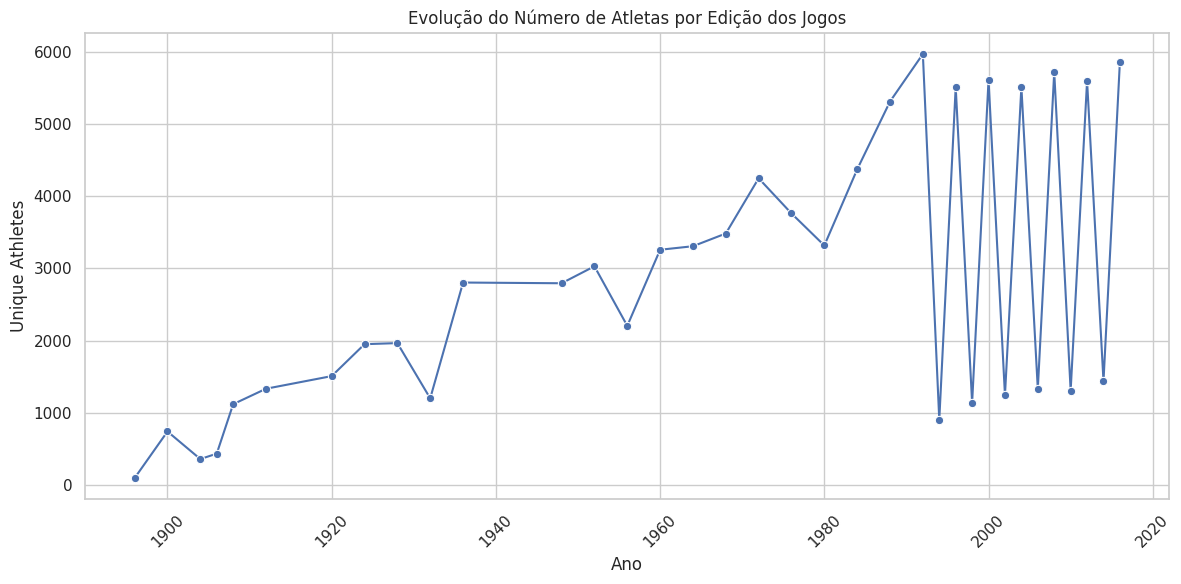

In [9]:
# Evolução do número de atletas por edição dos jogos
athletes_by_year = athletes.groupby("Year")["ID"].nunique().reset_index()
athletes_by_year.columns = ["Year", "Unique Athletes"]

plt.figure(figsize=(12,6))
sns.lineplot(data=athletes_by_year, x="Year", y="Unique Athletes", marker="o")
plt.title("Evolução do Número de Atletas por Edição dos Jogos")
plt.xlabel("Ano")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-10-8689669337ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


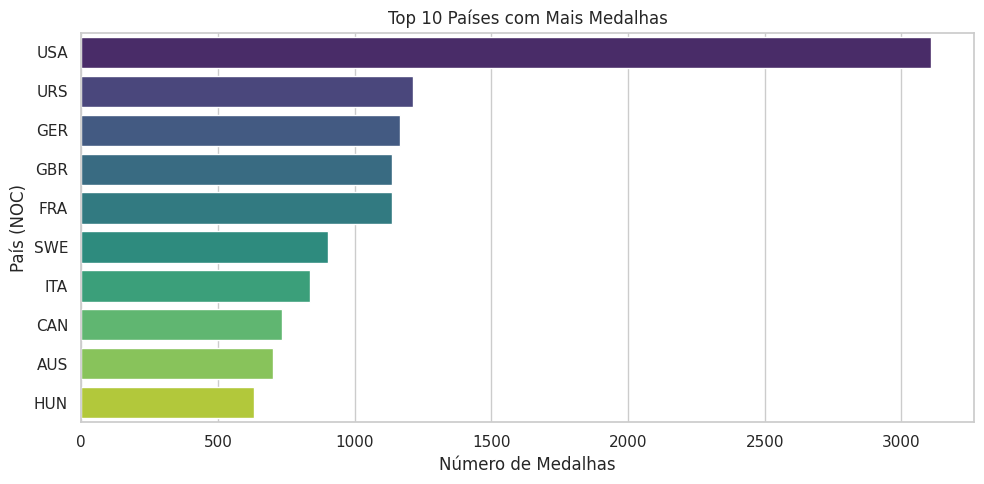

In [10]:
# Distribuição de medalhas por país (Top 10)
medals = athletes.dropna(subset=["Medal"])
top_countries = medals["NOC"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Países com Mais Medalhas")
plt.xlabel("Número de Medalhas")
plt.ylabel("País (NOC)")
plt.tight_layout()
plt.show()

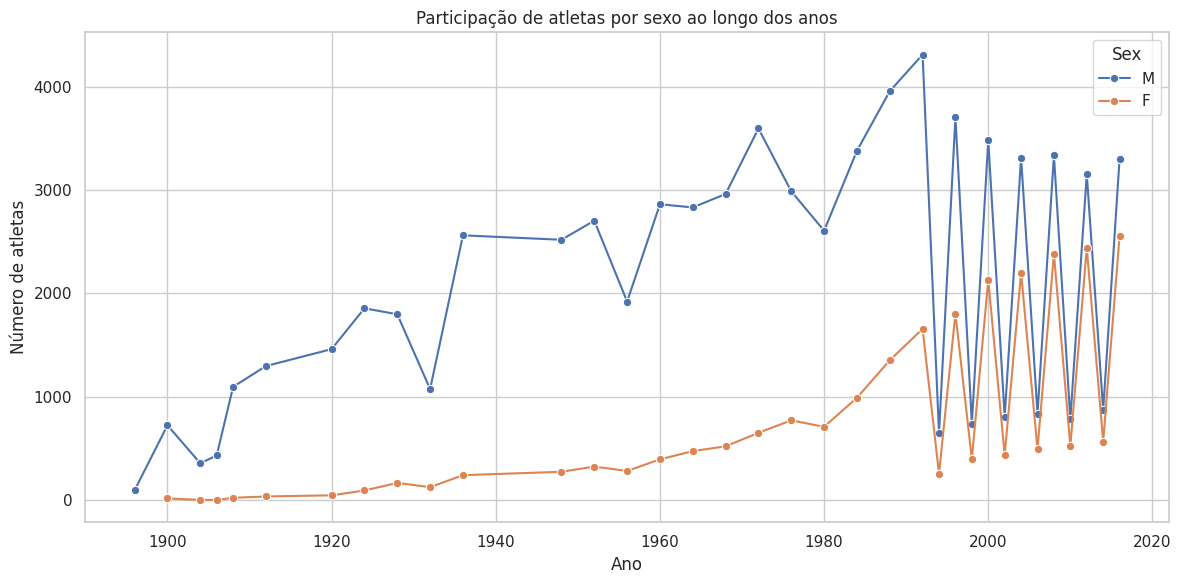

In [11]:
# Comparação de atletas por sexo ao longo dos anos
gender_year = athletes.groupby(["Year","Sex"])["ID"].nunique().reset_index()
gender_year.columns = ["Year","Sex","Unique Athletes"]

plt.figure(figsize=(12,6))
sns.lineplot(data=gender_year, x="Year", y="Unique Athletes", hue="Sex", marker="o")
plt.title("Participação de atletas por sexo ao longo dos anos")
plt.ylabel("Número de atletas")
plt.xlabel("Ano")
plt.tight_layout()
plt.show()

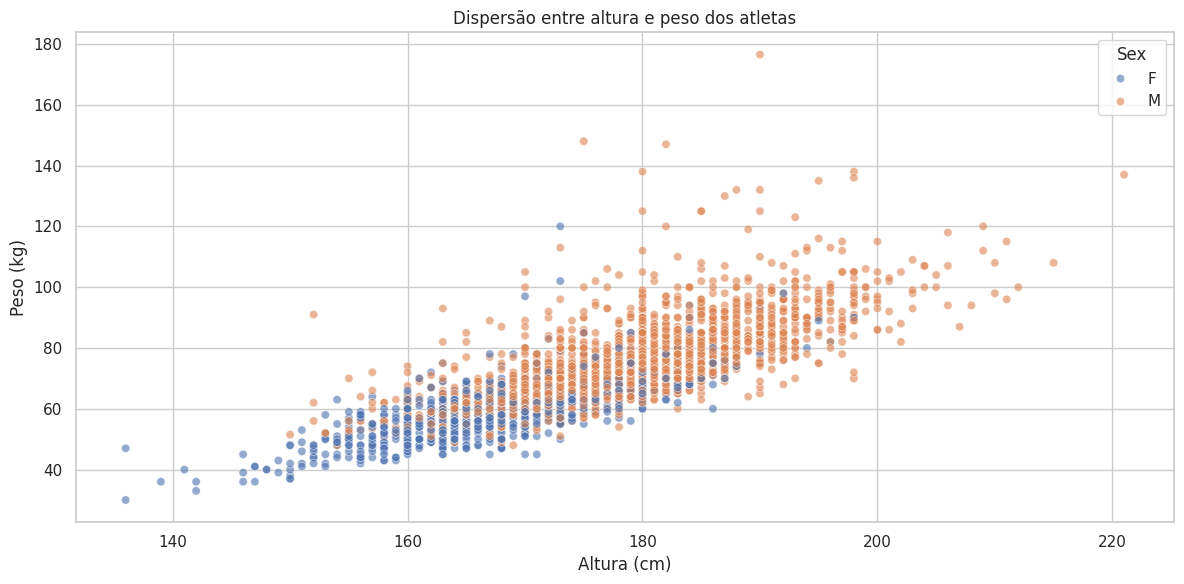

In [12]:
# Análise de altura e peso dos atletas por esporte
plt.figure(figsize=(12,6))
sample = athletes.dropna(subset=["Height", "Weight"]).sample(3000) # para não pesar o gráfico
sns.scatterplot(data=sample, x="Height", y="Weight", hue="Sex", alpha=0.6)
plt.title("Dispersão entre altura e peso dos atletas")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.tight_layout()
plt.show()

<ipython-input-13-c79e24b0a77a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_age.values, y=sport_age.index, palette="magma")


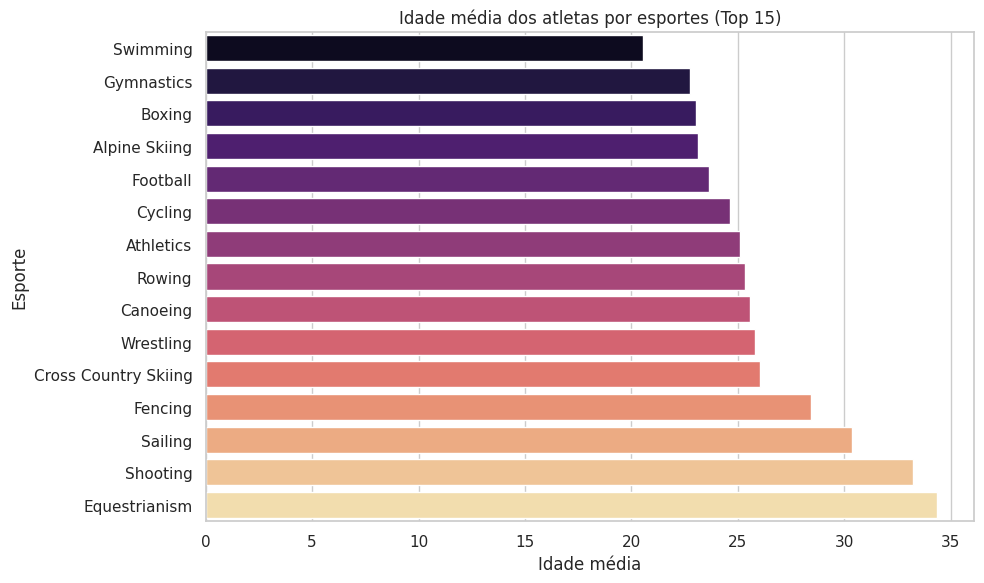

In [13]:
# Idade média dos atletas por esporte (Top 15 mais populares)
top_sports = athletes["Sport"].value_counts().head(15).index
sport_age = athletes[athletes["Sport"].isin(top_sports)].groupby("Sport")["Age"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=sport_age.values, y=sport_age.index, palette="magma")
plt.title("Idade média dos atletas por esportes (Top 15)")
plt.xlabel("Idade média")
plt.ylabel("Esporte")
plt.tight_layout()
plt.show()

In [14]:
# Verificando valores ausentes
missing = athletes.isnull().sum()
print("Valores ausentes por coluna:")
print(missing[missing > 0])

# Substituir medalhas ausentes por "No Medal"
athletes["Medal"].fillna("No Medal", inplace=True)

# Remover registros com altura, peso ou idade ausentes (ou você pode optar por imputação)
athletes = athletes.dropna(subset=["Age", "Height", "Weight"])

# Verificar de novo
print("\nÁpos o tratamento:")
print(athletes.isnull().sum())

Valores ausentes por coluna:
Age         4999
Height     32480
Weight     34056
Season         1
City           1
Sport          1
Event          1
Medal     123258
dtype: int64

Ápos o tratamento:
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    1
City      1
Sport     1
Event     1
Medal     0
dtype: int64


<ipython-input-14-ee0ff4a1548b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  athletes["Medal"].fillna("No Medal", inplace=True)


In [15]:
# Transformar colunas categóricas para lowercase
athletes["Sex"] = athletes["Sex"].str.upper()
athletes["Medal"] = athletes["Medal"].str.title()

# Coluna "Year" é numérica, mas podemos criar uma coluna de data se necessário
athletes["Year"] = athletes["Year"].astype(int)
athletes["Edition_Date"] = pd.to_datetime(athletes["Year"], format="%Y")

# Confirmar tipos:
print("\nTipos de dados atualizados:")
print(athletes.dtypes)


Tipos de dados atualizados:
ID                       int64
Name                    object
Sex                     object
Age                    float64
Height                 float64
Weight                 float64
Team                    object
NOC                     object
Games                   object
Year                     int64
Season                  object
City                    object
Sport                   object
Event                   object
Medal                   object
Edition_Date    datetime64[ns]
dtype: object


In [16]:
# Altura está em cm, converter para metros para o cálculo
athletes["Height_m"] = athletes["Height"] / 100
athletes["BMI"] = (athletes["Weight"] / (athletes["Height_m"] ** 2)).round(2)

In [17]:
def age_group(age):
    if age < 18:
      return "Menor de idade"
    elif age < 25:
      return "Jovem"
    elif age <= 35:
      return "Adulto"
    else:
      return "Veterano"

athletes["Age_Group"] = athletes["Age"].apply(age_group)

In [18]:
print("\nVisualização final das colunas:")
display(athletes.head())


Visualização final das colunas:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Edition_Date,Height_m,BMI,Age_Group
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,1992-01-01,1.80,24.69,Jovem
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,2012-01-01,1.70,20.76,Jovem
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,1988-01-01,1.85,23.96,Jovem
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,1988-01-01,1.85,23.96,Jovem
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,1992-01-01,1.85,23.96,Adulto


In [20]:
import plotly.express as px

# Evolução do número de atletas por ano
athletes_by_year = athletes.groupby("Year")["ID"].nunique().reset_index()
fig = px.line(athletes_by_year, x="Year", y="ID", title="Evolução do Número de Atletas nos Jogos Olímpicos", markers=True)
fig.update_layout(yaxis_title="Número de Atletas")
fig.show()

In [22]:
# Medalhas Por País (Top 10)
top10_medals = athletes[athletes["Medal"] != "No Medal"]["NOC"].value_counts().head(10).reset_index()
top10_medals.columns = ["Country", "Medals"]

fig = px.bar(top10_medals, x="Country", y="Medals", title="Top 10 países com mais medalhas", color="Medals")
fig.show()

In [23]:
# Proporção de atletas por sexo
sex_counts = athletes["Sex"].value_counts().reset_index()
sex_counts.columns = ["Sex", "Counts"]

fig = px.pie(sex_counts, names="Sex", values="Counts", title="Distribuição de atletas por sexo", hole=0.3)
fig.show()

In [24]:
# Distribuição de IMC (BMI) por grupo etário
fig = px.box(athletes, x="Age_Group", y="BMI", color="Age_Group", title="Distribuição de IMC por faixa etária")
fig.update_layout(xaxis_title="Grupo Etário", yaxis_title="IMC")
fig.show()

In [25]:
# Mapa de medalhas por país
medals_country = athletes[athletes["Medal"] != "No Medal"].groupby("NOC")["ID"].count().reset_index()
medals_country.columns = ["NOC", "Medals"]
medals_map = medals_country.merge(nocs, how="left", on="NOC")

fig = px.choropleth(
    medals_map,
    locations="NOC",
    color="Medals",
    hover_name="region",
    title="Mapa de medalhas por país (histórico olímpico)",
    color_continuous_scale="YlOrRd"
)
fig.show()

In [26]:
# Exportar os dados tratados para CSV
athletes.to_csv("athletes_clean.csv", index=False)